<a href="https://colab.research.google.com/github/masrik-dev/Deep-Learning-with-TensorFlow-and-Python/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Introduction to Regression with Neural Networks in TensorFlow**

 There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## **Creating data to view and fit**

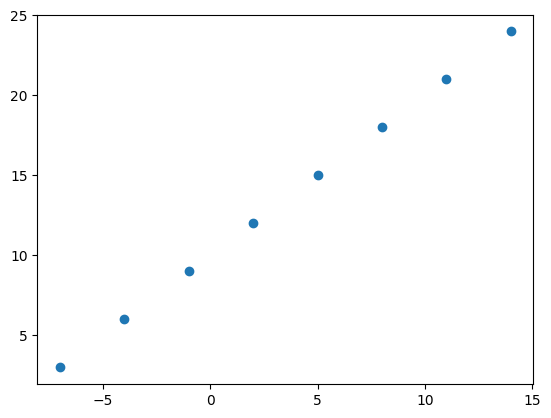

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

In [3]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## **Input and output shapes**

In [4]:
# Create a demo tensor for our housing prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], Y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [11]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
X.ndim, Y.ndim

(1, 1)

In [13]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

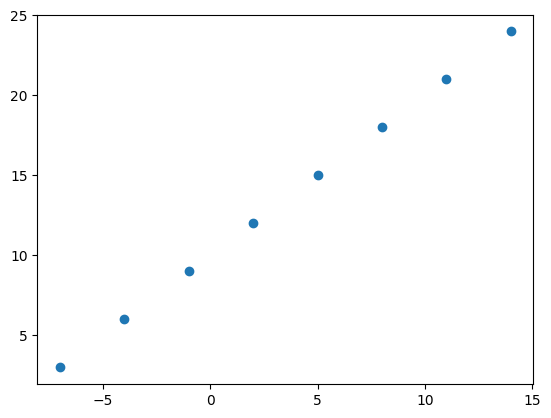

In [14]:
plt.scatter(X, Y)

## **Steps in modelling with TensorFlow**

1. **Creating a model** - define the input an doutput layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is), the optimizer (tells our model how to improve the patterns its learning), and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (feqtures and labels).


In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 19.6649 - mae: 19.6649
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 19.3837 - mae: 19.3837
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 19.1024 - mae: 19.1024
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 18.8212 - mae: 18.8212
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 18.5399 - mae: 18.5399


In [16]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using this model
P = model.predict(np.array([17.0])) # make input as NumPy array
T = model.predict(tf.constant([17.0])) # make input as Tensor
P, T

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


(array([[-17.89113]], dtype=float32), array([[-17.89113]], dtype=float32))

In [18]:
model.predict(tf.constant([20.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


array([[-21.055008]], dtype=float32)

### **Improving our model**

We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [19]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7.7667 - mae: 7.7667
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 7.6342 - mae: 7.6342
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 7.5017 - mae: 7.5017
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 7.4719 - mae: 7.4719
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 7.4662 - mae: 7.4662
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 7.4606 - mae: 7.4606
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 7.4550 - mae: 7.4550
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 7.4494 - mae: 7.4494
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 7.4437 - mae: 7.4437
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 7.4381 - mae: 7.4381
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 7.4325 - mae: 7.4325
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [20]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[30.38979]], dtype=float32)

### **Let's update our model again**

In [22]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step - loss: 12.7830 - mae: 12.7830
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 12.1855 - mae: 12.1855
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.5809 - mae: 11.5809
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.9623 - mae: 10.9623
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.3307 - mae: 10.3307
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.6862 - mae: 9.6862
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.0123 - mae: 9.0123
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.3001 - mae: 8.3001
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.5476 - mae: 7.5476
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.7525 - mae: 6.7525
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.9110 - mae: 5.9110
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.0049 - mae: 5.0049
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [23]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[32.65839]], dtype=float32)

### **Let's improve our model again**

* Next, increase the number of hidden units (we already tried **tf.keras.layers.Dense(100, activation="relu")**), so we skip this part.
* Now, we will change the **activation function**

In [25]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step - loss: 13.7978 - mae: 13.7978
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 13.2295 - mae: 13.2295
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 12.6614 - mae: 12.6614
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 12.0904 - mae: 12.0904
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 11.5135 - mae: 11.5135
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 10.9279 - mae: 10.9279
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 10.3304 - mae: 10.3304
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 9.7180 - mae: 9.7180
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 9.0875 - mae: 9.0875
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 8.4357 - mae: 8.4357
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 7.7593 - mae: 7.7593
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 7.2245 - mae: 7.2245
Epoch 13/100
1/1 ━━━━━━━

In [26]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [27]:
# Let test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[30.186028]], dtype=float32)

### **Again, Let improve our model**
* Change the optimization function from **SGD** to **Adam**

In [28]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.5802 - mae: 13.5802
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 13.4792 - mae: 13.4792
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.3781 - mae: 13.3781
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 13.2770 - mae: 13.2770
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 13.1759 - mae: 13.1759
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 13.0747 - mae: 13.0747
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 12.9734 - mae: 12.9734
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 12.8720 - mae: 12.8720
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 12.7706 - mae: 12.7706
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 12.6691 - mae: 12.6691
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 12.5675 - mae: 12.5675
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 12.4658 - mae: 12.4658
Epoch 13/100
1/1 ━━━

In [29]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
# Test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[30.444168]], dtype=float32)

### **Let's improve our model again**
* Change the **learning rate = lr** of the optimization function **Adam()**

In [31]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # default lr= 0.001
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.9463 - mae: 12.9463
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.9756 - mae: 11.9756
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.0007 - mae: 11.0007
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.0189 - mae: 10.0189
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.0246 - mae: 9.0246
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.0104 - mae: 8.0104
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6.9687 - mae: 6.9687
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 6.9450 - mae: 6.9450
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 7.3652 - mae: 7.3652
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 7.7909 - mae: 7.7909
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.8745 - mae: 7.8745
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.6724 - mae: 7.6724
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [32]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
# Let's test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[27.4402]], dtype=float32)

### **Almost correct prediction but not super good**

> when it comes to evaluation... **Visualize it**

It's a good idea to visualize:
* **The Data -** what data are we working with? What does it look like?
* **The model itself -** what does our model look like?
* **The training of a model -** how does a model perform while it learns?
* **The predictions of the model -** how do the predictions of a model line up against the ground truth (the original labels)?

In [34]:
# Make a biddger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [35]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

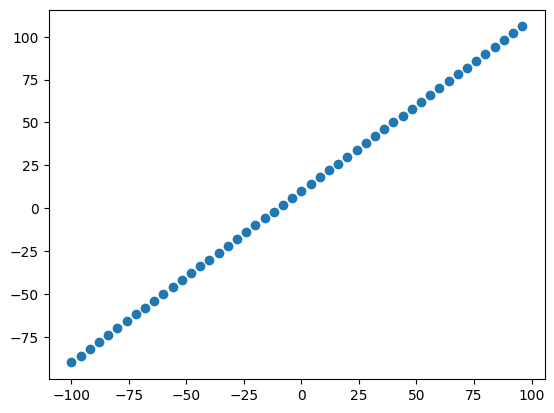

In [36]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### **The 3 sets**
* **Training set -** the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set -** the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set -** the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [37]:
# Check the length of how many samples we have
len(X)

50

In [38]:
# Split the data into train and test sets
X_train = X[0:40]   # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]   # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### **Visualizing the data**
* **Now, we'he got our data in training and test sets. Let's visualize it again!**

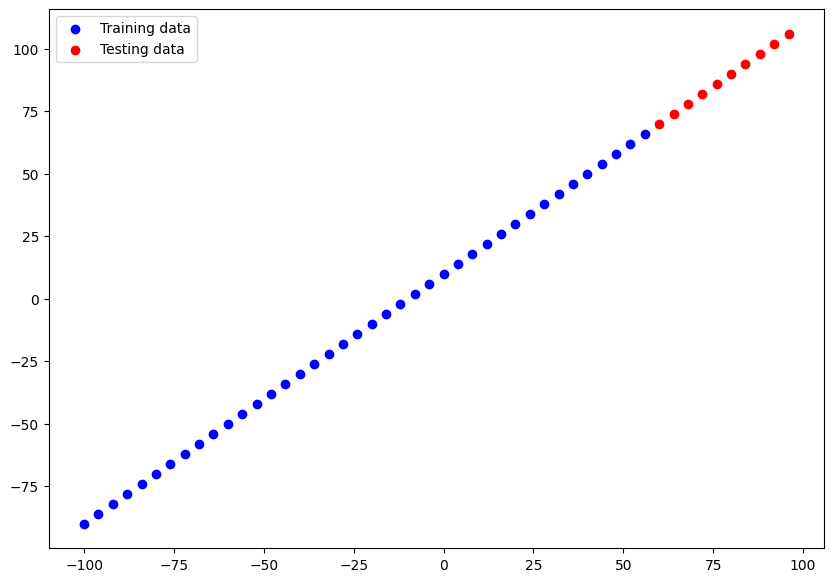

In [39]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in red
plt.scatter(X_test, y_test, c="r", label="Testing data")

# Show a legend
plt.legend();

In [40]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 25.8024 - mae: 25.8024 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.4931 - mae: 8.4931
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.9619 - mae: 9.9619  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.6426 - mae: 11.6426
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.6029 - mae: 8.6029
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.0716 - mae: 10.0716
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.7882 - mae: 11.7882
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.7126 - mae: 8.7126
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.1814 - mae: 10.1814
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.9401 - mae: 11.9401
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.6924 - mae: 12.6924
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.1548 - mae: 8.1548
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [41]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when we bring in already learn patterns or parameters from other models during **transfer learning**).

🎬**Resource:** For a more in-depth overview of the trainable parameters within a layer: **MIT's introduction to deep learning video** https://www.youtube.com/watch?v=alfdI7S6wCY



In [43]:
# We will change the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling "model.summary()"
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [44]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
print(X_train.ndim)

1


In [46]:
# Let's test our model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Let's fit our model to the training data
model.fit(X_train, tf.expand_dims(y_train, axis=-1), epochs=100, verbose=1) # Reshape the dimension of y_train to match output

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 39.9689 - mae: 39.9689 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 32.5306 - mae: 32.5306
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 25.6021 - mae: 25.6021
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 21.0013 - mae: 21.0013
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.1137 - mae: 17.1137
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13.2927 - mae: 13.2927
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.9081 - mae: 9.9081  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.7622 - mae: 7.7622
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.0045 - mae: 8.0045
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.8655 - mae: 7.8655
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.7774 - mae: 7.7774
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.8627 - mae: 7.8627
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

In [47]:
# Get a summary of our model
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

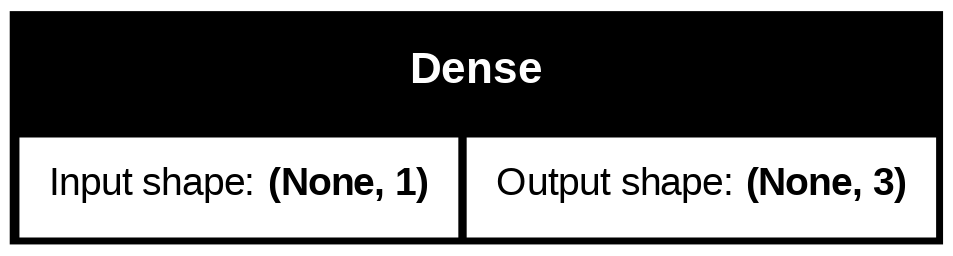

In [48]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [49]:
# Let's test our model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Let's fit our model to the training data
model.fit(X_train, tf.expand_dims(y_train, axis=-1), epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Get a summary of our model
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

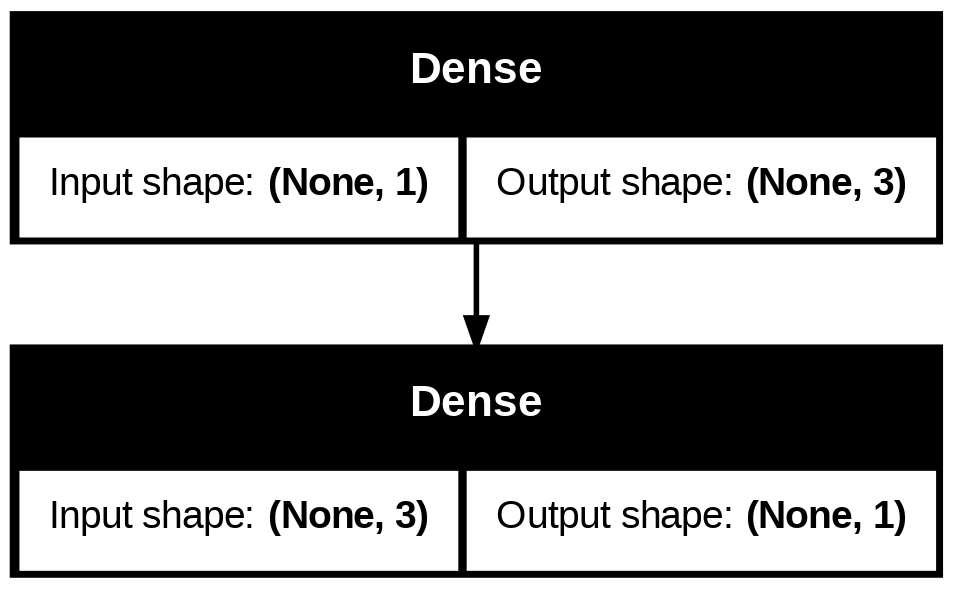

In [51]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### **Visualizing our model's prediction**

* To visualize predictions, it's a good idea to plot them against the ground truth labels.
* Often we'll see this in the form of **y_test** or **y_true** versus **y_pred** (ground truth versus our model's predictions).

In [52]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[34.32783 ],
       [36.48721 ],
       [38.646587],
       [40.80596 ],
       [42.96534 ],
       [45.124714],
       [47.284092],
       [49.44347 ],
       [51.602844],
       [53.762222]], dtype=float32)

In [53]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If we are going to reuse some kind of functionality in the future, it's good idea to turn it into a function.

In [54]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


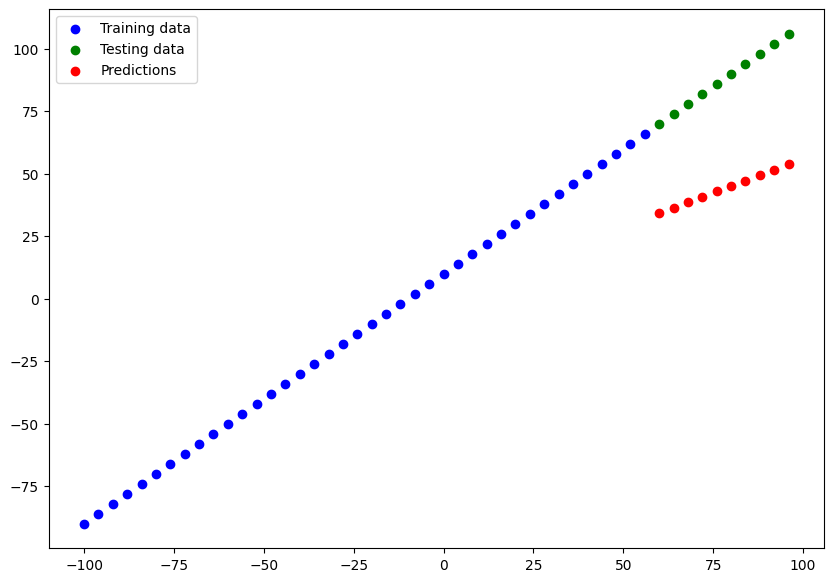

In [55]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## **Evaluting our model's predictions with regression evaluating metrics**

**Depending on the problem we're working on, there will be different evaluation metrics to evaluate your model's performance.**

Since we're working on a regression, two of the main metrics:
* **MAE - mean absolute error, "on average, how wrong is each of the model's predictions"**
* **MSE - mean square error, "on average, how wrong is the square of each of the models predictions"**

In [56]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 43.9550 - mae: 43.9550


[43.95497512817383, 43.95497512817383]

In [57]:
# Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test, y_pred)
result = mae.result().numpy()
print(result)

43.954975


In [58]:
# Calculate the mean absolute error (in latest version this code will work)
tf.keras.metrics.mae(y_true=y_test,
                     y_pred=y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([35.67217 , 37.51279 , 39.353413, 41.19404 , 43.03466 , 44.875286,
       46.715908, 48.55653 , 50.397156, 52.237778], dtype=float32)>

**We should have one output value like previous cell.**

In [59]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[34.32783 ],
       [36.48721 ],
       [38.646587],
       [40.80596 ],
       [42.96534 ],
       [45.124714],
       [47.284092],
       [49.44347 ],
       [51.602844],
       [53.762222]], dtype=float32)>

In [60]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**y_pred** has extra dimention (10, 1) than **y_test** (10,)

In [61]:
# Let's bring out the extra dimension in y_pred
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.32783 , 36.48721 , 38.646587, 40.80596 , 42.96534 , 45.124714,
       47.284092, 49.44347 , 51.602844, 53.762222], dtype=float32)>

In [62]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mae(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.95497512817383>

In [63]:
# Calculate the mean square error
mse = tf.keras.metrics.mse(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1959.9898681640625>

In [64]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.mae(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.keras.metrics.mse(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))


### **Running experiments to improve our model**

`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...`

1. **Get more data-** get more examples for your model to train on (more opportunities to learn patterns or relationships or relationships between features and labels).
2. **Make our model larger (using a more complex model)-** this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer-** give your model more of a chance to find patterns in the data.


In [65]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Let's do 3 modelling experiments:**
1. **`model_1`-** same as the original model, **1** layer, trained for **100** epochs.
2. **`model_2`- 2** layers, trained for **100** epochs.
3. **`model_3`- 2** layers, trained for **500** epochs.

### **Build `model_1`**

In [87]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 33.1822 - mae: 33.1822 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.3987 - mae: 8.3987
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.8675 - mae: 9.8675
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.5211 - mae: 11.5211
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.5085 - mae: 8.5085
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.9772 - mae: 9.9772  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.6667 - mae: 11.6667
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.6182 - mae: 8.6182
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.0870 - mae: 10.0870 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.8122 - mae: 11.8122
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.7280 - mae: 8.7280
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.1967 - mae: 10.1967
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


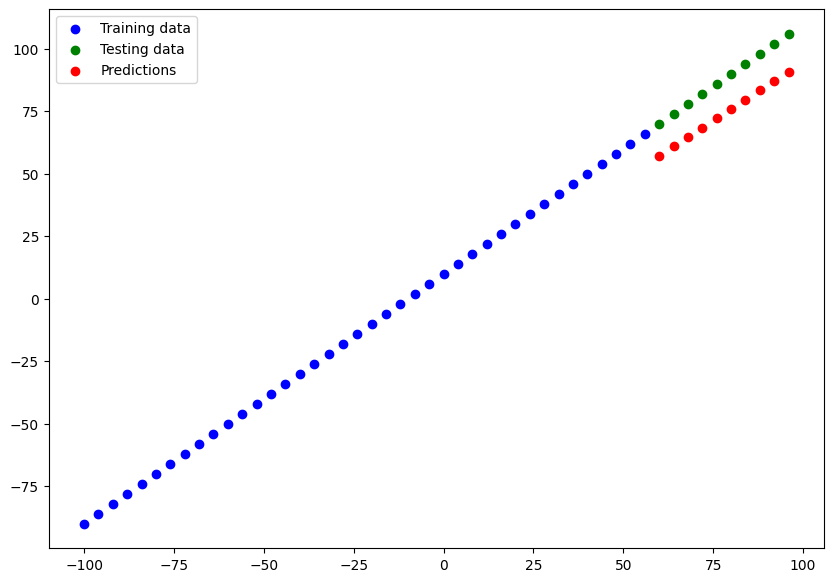

In [88]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [89]:
# Calculate model_1 evaluation matrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=13.976293563842773>,
 <tf.Tensor: shape=(), dtype=float32, numpy=195.96510314941406>)

### **Build `model_2`**
* **2** dense layers, trained for **100** epochs

In [90]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 31.4384 - mse: 1378.5731 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 25.9128 - mse: 919.1125
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 23.6272 - mse: 757.7975
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 20.1069 - mse: 545.1136
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.6235 - mse: 253.0570
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.9489 - mse: 479.3312
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.8056 - mse: 277.9532
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.0889 - mse: 315.1233
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.9293 - mse: 341.8310 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.9963 - mse: 217.9033
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.9982 - mse: 308.7085
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.0713 - mse: 192.4652
Epoch 13/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


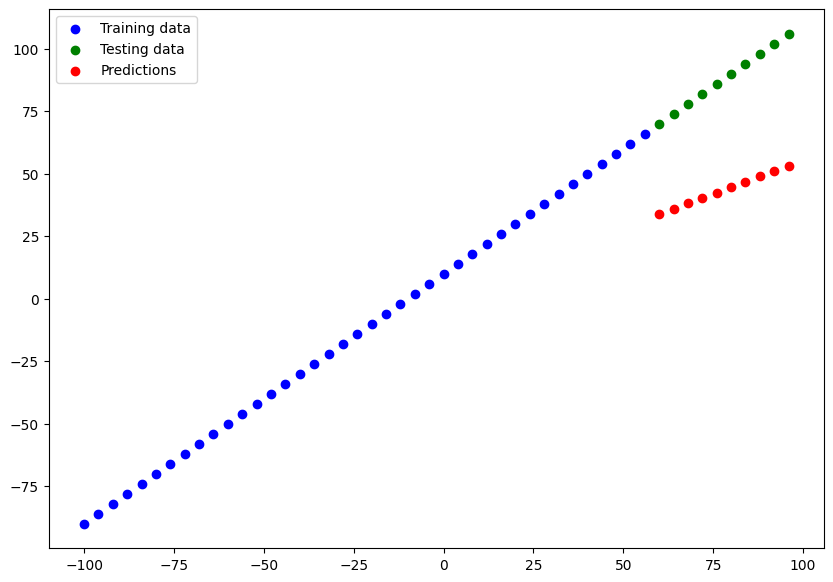

In [91]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [92]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=44.41241455078125>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2000.520751953125>)

### **Build `model-3`**
* **2** layers, trained for **500** epochs.

In [93]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 21.0043 - mae: 21.0043 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.7610 - mae: 19.7610
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 20.0070 - mae: 20.0070
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.4570 - mae: 17.4570
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.1987 - mae: 16.1987
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.3274 - mae: 16.3274
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.8301 - mae: 11.8301
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.7261 - mae: 14.7261 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 15.6101 - mae: 15.6101
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.7394 - mae: 11.7394
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.7173 - mae: 14.7173
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.8460 - mae: 10.8460
Epoch 13/500
2/2 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


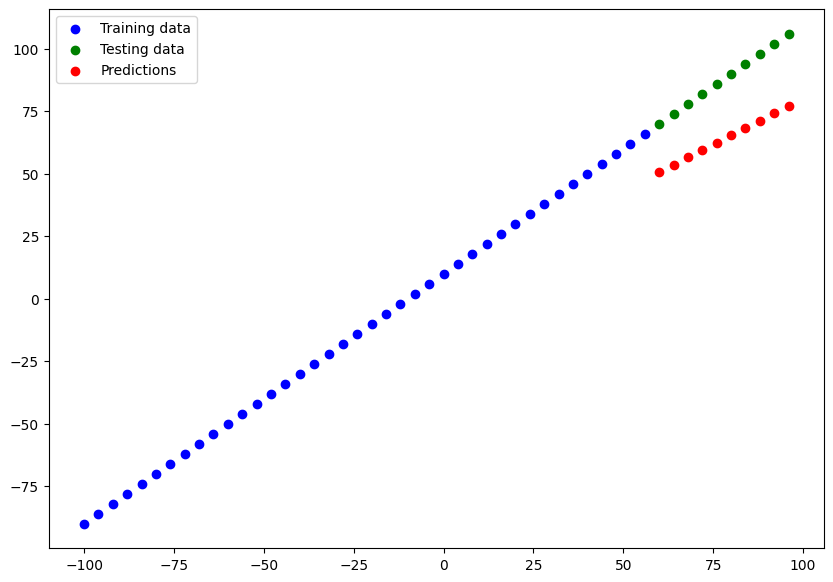

In [94]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [95]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=24.13210678100586>,
 <tf.Tensor: shape=(), dtype=float32, numpy=591.7313232421875>)

🔑 **Note: We have to start with small experiments (small models) and make sure they work and then increase their scale when necessary.**

## **Comparing the results of mour experiments**
We've run a few experiments, let's compare the results.

In [96]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,13.976294,195.965103
1,model_2,44.412415,2000.520752
2,model_3,24.132107,591.731323


**Looks like model_1 performed the best**

* **Note: This can change each time we run the code. During code run for the 1st time, `model_1` performed best.**

In [97]:
model_1.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

🔑 **Note: One of our main goal should be to minimize the time between our experiments. The more experiments we do, the more things we'll figure out which don't work. And in turn, we'll get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".**

## **Tracking our experiments**

One really good habit in machine learning modelling is to track the results of our experiments.

And when we'll doing so, it can be tedious if we're running lots of experiments.

Luckily, there are tools to help us!

⚒ **Resource:** As we build more models, we'll be using:
* **TensorBoard**- a component of the TensorFlow library to help track modelling experiments.
* **Weights & Biases**- a tool for tracking all of kinds of machine learning experiments (plug straight into TensorBoard)

# **Saving our models**
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. **The SavedModel format**
2. **The HDF5 format**

In [98]:
# Save model using the SavedModel format
tf.saved_model.save(model_1, 'best_model_SavedModel_format')

In [99]:
# Save model using the HDF5 format
model_1.save('best_model_SavedModel_format.h5')

## Save in SavedModel format
`model.save('my_model', save_format='tf')`

## Save in HDF5 format
`model.save('my_model.h5')`

In [100]:
# Test of savedmodel
# model.save('model_1', save_format='tf')
# the line do not work
model_1.save('model_1_save_test.keras')
# Worked but don't know how to use it

In [101]:
# Test the HDF5 model
model.save('model_1_test_hdf5.h5')
# Worked but don't know how to use it

### **Test Something came to my mind**

In [102]:
tf.saved_model.save(model_1, 'test_hdf5.h5')

* Worked, but looks like the file name is **`test_hdf5.h5`**
* The process is not **HDF5** but **SavedModel**

## **Loading in a saved model**

In [103]:
# Load in the SavedModel format model
loaded_saved_model = tf.keras.layers.TFSMLayer("/content/best_model_SavedModel_format", call_endpoint='serving_default')
loaded_saved_model

<TFSMLayer name=tfsm_layer_1, built=True>

In [104]:
loaded_again = tf.saved_model.load("/content/best_model_SavedModel_format")
loaded_again

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7ae442a28f50>

In [105]:
# loaded_again.summary()
# Can't implement the `summary()` application

### **use this bellow format**

In [106]:
# But we can apply it ("summary()") in `.h5` file.
load_model = tf.keras.models.load_model("/content/best_model_SavedModel_format.h5")
load_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [107]:
model_1.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [112]:
# Compare model_1 predictions with SavedModel format model predictions
# Use the model that can call `.summary()` ~ here the model of `.h5` file
model_1_preds = model_1.predict(X_test)
load_model_preds = load_model.predict(X_test)
model_1_preds == load_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [113]:
mae(y_true = y_test, y_pred = model_1_preds) == mae(y_true = y_test, y_pred = load_model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [119]:
load_model == loaded_again

False